In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn import datasets
import warnings

from gini_tree import build_tree,classify_object,find_best_split,gini,Leaf,Node,predict,quality,split

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def accuracy_metric(actual, predicted):
    return np.sum(actual==predicted)/len(actual)

def balanced_accuracy_metric(actual, predicted):
    true_predicted=(actual==predicted).astype(int)
    sensitivity=np.sum(actual*true_predicted)/np.sum(actual==1)
    specificity=np.sum((1-actual)*true_predicted)/np.sum(actual==0)
    return 0.5*(sensitivity+specificity)

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [3]:


classification_data, classification_labels = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 2, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=5)

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_data, 
                                                                                     classification_labels, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_labels)
# Напечатаем ход нашего дерева
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
    
print_tree(my_tree)

Индекс 0
Порог 0.16261402870113306
--> True:
  Индекс 1
  Порог -1.5208896621663803
  --> True:
    Индекс 0
    Порог -0.9478301462477035
    --> True:
      Прогноз: 0
    --> False:
      Прогноз: 1
  --> False:
    Прогноз: 0
--> False:
  Прогноз: 1


In [4]:
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)

In [5]:
train_answers = predict(train_data, my_tree)
answers = predict(test_data, my_tree)

Точность модели с использовнием *критерия Джинни*

In [6]:
train_accuracy=accuracy_metric(train_labels, train_answers)
accuracy_metric(train_labels, train_answers), balanced_accuracy_metric(train_labels, train_answers)

(0.9857142857142858, 0.9857142857142858)

In [7]:
test_accuracy=accuracy_metric(test_labels, answers)
accuracy_metric(test_labels, answers), balanced_accuracy_metric(test_labels, answers)

(1.0, 1.0)

In [8]:
from shannon_tree import build_tree,classify_object,find_best_split,shannon,Leaf,Node,predict,quality,split

In [9]:
S_train_data, S_test_data, S_train_labels, S_test_labels = model_selection.train_test_split(classification_data, 
                                                                                     classification_labels, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)
# Строим дерево с использованием энетропии Шеннона
shan_tree = build_tree(S_train_data, S_train_labels)
# Напечатаем ход нашего дерева
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
    
print_tree(shan_tree)

Индекс 0
Порог 0.16261402870113306
--> True:
  Индекс 0
  Порог -0.11161924805848533
  --> True:
    Индекс 1
    Порог -1.9402933258134305
    --> True:
      Прогноз: 0
    --> False:
      Прогноз: 0
  --> False:
    Прогноз: 0
--> False:
  Прогноз: 1


In [10]:
S_train_answers = predict(S_train_data, shan_tree)
S_answers = predict(S_test_data, shan_tree)

Точность модели с использованием энетропии Шеннона

In [11]:
S_train_accuracy=accuracy_metric(S_train_labels, S_train_answers)
accuracy_metric(S_train_labels, S_train_answers), balanced_accuracy_metric(S_train_labels, S_train_answers)

(0.9285714285714286, 0.9285714285714286)

In [12]:
S_test_accuracy=accuracy_metric(S_test_labels, S_answers)
accuracy_metric(S_test_labels, S_answers), balanced_accuracy_metric(S_test_labels, S_answers)

(0.9666666666666667, 0.9666666666666667)

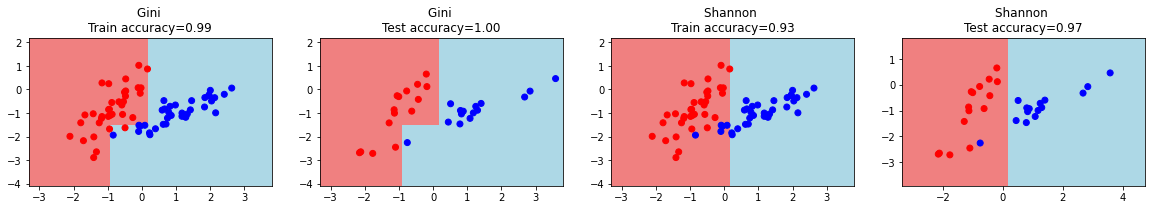

In [13]:
colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])


plt.figure(figsize = (20, 6))


plt.subplot(2,4,1)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Gini \nTrain accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(2,4,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Gini \nTest accuracy={test_accuracy:.2f}')


plt.subplot(2,4,3)
S_xx, S_yy = get_meshgrid(S_train_data)
S_mesh_predictions = np.array(predict(np.c_[S_xx.ravel(), S_yy.ravel()], shan_tree)).reshape(S_xx.shape)
plt.pcolormesh(S_xx, S_yy, S_mesh_predictions, cmap = light_colors)
plt.scatter(S_train_data[:, 0], S_train_data[:, 1], c = S_train_labels, cmap = colors)
plt.title(f'Shannon \nTrain accuracy={S_train_accuracy:.2f}')

plt.subplot(2,4,4)
S_xx, S_yy = get_meshgrid(S_test_data)
S_mesh_predictions = np.array(predict(np.c_[S_xx.ravel(), S_yy.ravel()], shan_tree)).reshape(S_xx.shape)
plt.pcolormesh(S_xx, S_yy, S_mesh_predictions, cmap = light_colors)
plt.scatter(S_test_data[:, 0], S_test_data[:, 1], c = S_test_labels, cmap = colors)
plt.title(f'Shannon \nTest accuracy={S_test_accuracy:.2f}')

plt.show()


### Я не стал впихивать код деревьев в ноутбук и просто вызвал методы их них последовательно для обоих деревьев. Метод c энтропией Шеннона изложен ниже:

In [14]:
def shannon(labels):
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1

    for label in classes:
        p = classes[label] / len(labels)
        criteria = -(np.sum(p * np.log2(p)))
        return criteria

### Глядя на точность и графики можно сказать, что на конкретных данных индекс Джинни работает гораздо лучше. Если конечно я правильно реализовал функцию энтропии